In [59]:
try:
    from PIL import Image, ImageEnhance
except ImportError:
    import Image
import pytesseract

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
%matplotlib notebook

In [3]:
import pandas as pd
import io

In [71]:
img = Image.open("text.png").convert("L")

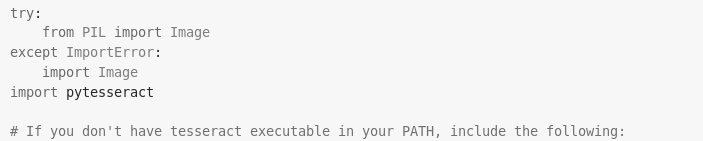

In [72]:
img

In [57]:
custom_config = r"-c preserve_interword_spaces=1 --oem 1"

In [58]:
print(pytesseract.image_to_string(img, config=custom_config))

 

from PIL import Image

except Importerror:
import Image

import pytesseract

# If you don't have tesseract executable in your PATH, include the following



In [11]:
data = pytesseract.image_to_data(img)

In [12]:
df = pd.read_table(io.StringIO(data))
df.text = df.text.fillna("")
df.text = df.text.astype(str)

In [79]:
df.head()

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,703,141,-1,
1,2,1,1,0,0,0,7,4,36,21,-1,
2,3,1,1,1,0,0,7,4,36,21,-1,
3,4,1,1,1,1,0,7,4,36,21,-1,
4,5,1,1,1,1,1,7,4,36,21,95,


In [76]:
for idx, row in df.iterrows():
    if row.text:
        box = (row.left, row.top, row.left + row.width, row.top + row.height)
        region = img.crop(box)
        region = region.transpose(Image.ROTATE_180)
        img_.paste(region, box)

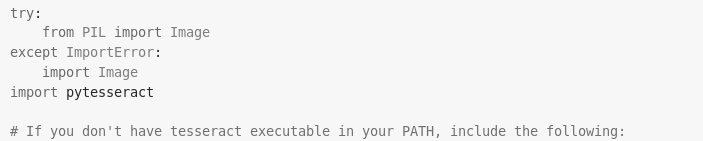

In [77]:
img

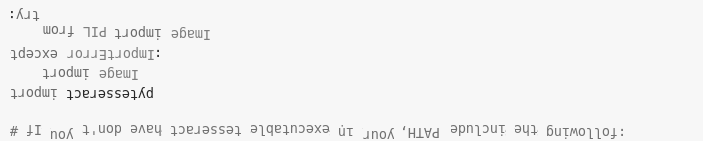

In [78]:
img_

## draw boxes with mpl

In [24]:
imh = mpimg.imread("text.png")

<IPython.core.display.Javascript object>


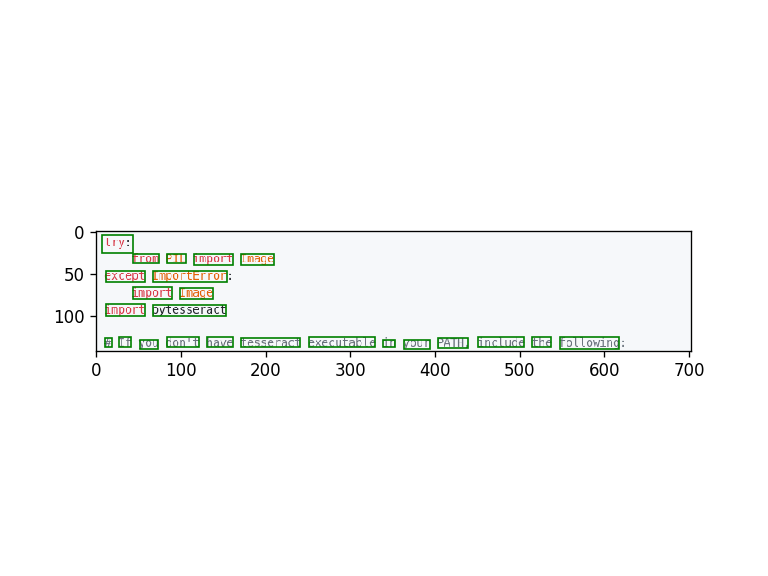

  -> (7, 4)
from -> (43, 26)
PIL -> (83, 27)
import -> (115, 26)
Image -> (171, 27)
except -> (11, 47)
Importerror: -> (67, 47)
import -> (43, 66)
Image -> (99, 67)
import -> (11, 86)
pytesseract -> (67, 87)
# -> (10, 126)
If -> (27, 125)
you -> (51, 128)
don't -> (83, 125)
have -> (131, 125)
tesseract -> (171, 126)
executable -> (251, 125)
in -> (339, 128)
your -> (363, 128)
PATH, -> (403, 126)
include -> (451, 125)
the -> (515, 125)
following -> (547, 125)


In [80]:
fig, ax = plt.subplots(1)
ax.imshow(imh)
for idx, row in df.iterrows():
    if row.text:
        ax.add_patch(patches.Rectangle((row.left, row.top),
                                       row.width,
                                       row.height,
                                       fill=False, color="g"))
        print(row.text, "->", (row.left, row.top))
plt.show()